In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

2023-10-31 11:49:30.892514: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 11:49:30.968133: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 11:49:30.969080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 11:49:32.510224: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# df_ph = pd.read_csv('Dataset/Ph.csv')
# df_kelembapan = pd.read_csv('Dataset/kelembapan.csv')
df_yield = pd.read_csv('Dataset/Hasil Panen OKE sip.csv')
df_hujan = pd.read_csv('Dataset/curah hujan.csv')
# df_temp = pd.read_csv('Dataset/suhu tanah.csv')
# df_jarak = pd.read_csv('Dataset/jarak tanaman.csv')

In [3]:
## Data Curah Hujan
df_hujan.dropna(axis=0, inplace=True)
df_hujan.to_csv('udan.csv', index=False)
df_hujan_baru = pd.read_csv('udan.csv')
df_hujan_baru.info()

## Data Yield
df_yield.dropna(axis=0, inplace=True)
df_yield.to_csv('panen.csv', index=False)
df_panen_baru = pd.read_csv('panen.csv')
df_panen_baru['Produksi Padi (ton/gkg)'] = pd.to_numeric(df_panen_baru['Produksi Padi (ton/gkg)'],errors='coerce')
df_panen_baru = df_panen_baru.loc[:, ~df_panen_baru.columns.str.contains('^Unnamed')]
df_panen_baru.info()
# df_panen_baru

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tahun             60 non-null     int64  
 1   Bulan             60 non-null     object 
 2   curah hujan (mm)  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tahun                    59 non-null     int64  
 1   Bulan                    59 non-null     object 
 2   Luas Lahan               59 non-null     float64
 3   Luas Panen (ha)          59 non-null     float64
 4   Produksi Padi (ton/gkg)  59 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
## Data Yield
df_yield.to_csv('panen.csv', index=False)
df_panen_baru = pd.read_csv('panen.csv')
df_panen_baru['Produksi Padi (ton/gkg)'] = pd.to_numeric(df_panen_baru['Produksi Padi (ton/gkg)'],errors='coerce')
df_panen_baru = df_panen_baru.loc[:, ~df_panen_baru.columns.str.contains('^Unnamed')]
data = pd.merge(df_panen_baru, df_hujan, on=['Tahun', 'Bulan'])

# df_panen_baru.info()

In [5]:
data.shape
#X= 59 -> input
#y= 10 -> fitur/parameter

(59, 6)

In [6]:
data

,Tahun,Bulan,Luas Lahan,Luas Panen (ha),Produksi Padi (ton/gkg),curah hujan (mm)
0,2018,Februari,43573.0,16598.03,102755.27,273.90
1,2018,Maret,43573.0,9352.41,57899.01,250.60
2,2018,April,43573.0,2512.02,15551.44,177.30
3,2018,Mei,43573.0,9882.90,57103.19,41.30
4,2018,Juni,43573.0,7680.37,44377.02,0.00
5,2018,Juli,43573.0,3594.00,20766.00,0.00
6,2018,Agustus,43573.0,1793.23,10361.25,0.00
7,2018,September,43573.0,2663.34,18230.62,133.30
8,2018,Oktober,43573.0,1703.87,11663.03,142.00
9,2018,November,43573.0,925.73,6336.64,317.10


In [7]:
# month_mapping = {
#     'Januari': 1,
#     'Februari': 2,
#     'Maret': 3,
#     'April': 4,
#     'Mei': 5,
#     'Juni': 6,
#     'Juli': 7,
#     'Agustus': 8,
#     'September': 9,
#     'Oktober': 10,
#     'November': 11,
#     'Desember': 12
# }

In [8]:
## Parameter/Fitur
X = data[['curah hujan (mm)', 'Luas Panen (ha)','Luas Lahan']]
## Target
y = data['Produksi Padi (ton/gkg)']

# Onehot encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder
df_onehot = pd.get_dummies(data, columns=['Tahun', 'Bulan'], prefix=['Tahun', 'Bulan'])
data = df_onehot.loc[:, df_onehot.columns != 'Produksi Padi (ton/gkg)']
data['Produksi Padi (ton/gkg)'] = df_onehot['Produksi Padi (ton/gkg)']

In [10]:
data.shape

(59, 21)

In [11]:
data.dtypes

Luas Lahan                 float64
Luas Panen (ha)            float64
curah hujan (mm)           float64
Tahun_2018                    bool
Tahun_2019                    bool
Tahun_2020                    bool
Tahun_2021                    bool
Tahun_2022                    bool
Bulan_Agustus                 bool
Bulan_April                   bool
Bulan_Desember                bool
Bulan_Februari                bool
Bulan_Januari                 bool
Bulan_Juli                    bool
Bulan_Juni                    bool
Bulan_Maret                   bool
Bulan_Mei                     bool
Bulan_November                bool
Bulan_Oktober                 bool
Bulan_September               bool
Produksi Padi (ton/gkg)    float64
dtype: object

In [12]:
data

,Luas Lahan,Luas Panen (ha),curah hujan (mm),Tahun_2018,Tahun_2019,Tahun_2020,Tahun_2021,Tahun_2022,Bulan_Agustus,Bulan_April,...,Bulan_Februari,Bulan_Januari,Bulan_Juli,Bulan_Juni,Bulan_Maret,Bulan_Mei,Bulan_November,Bulan_Oktober,Bulan_September,Produksi Padi (ton/gkg)
0,43573.0,16598.03,273.90,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,102755.27
1,43573.0,9352.41,250.60,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,57899.01
2,43573.0,2512.02,177.30,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,15551.44
3,43573.0,9882.90,41.30,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,57103.19
4,43573.0,7680.37,0.00,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,44377.02
5,43573.0,3594.00,0.00,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,20766.00
6,43573.0,1793.23,0.00,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,10361.25
7,43573.0,2663.34,133.30,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,18230.62
8,43573.0,1703.87,142.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,11663.03
9,43573.0,925.73,317.10,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,6336.64


# Heat Map

<Axes: >

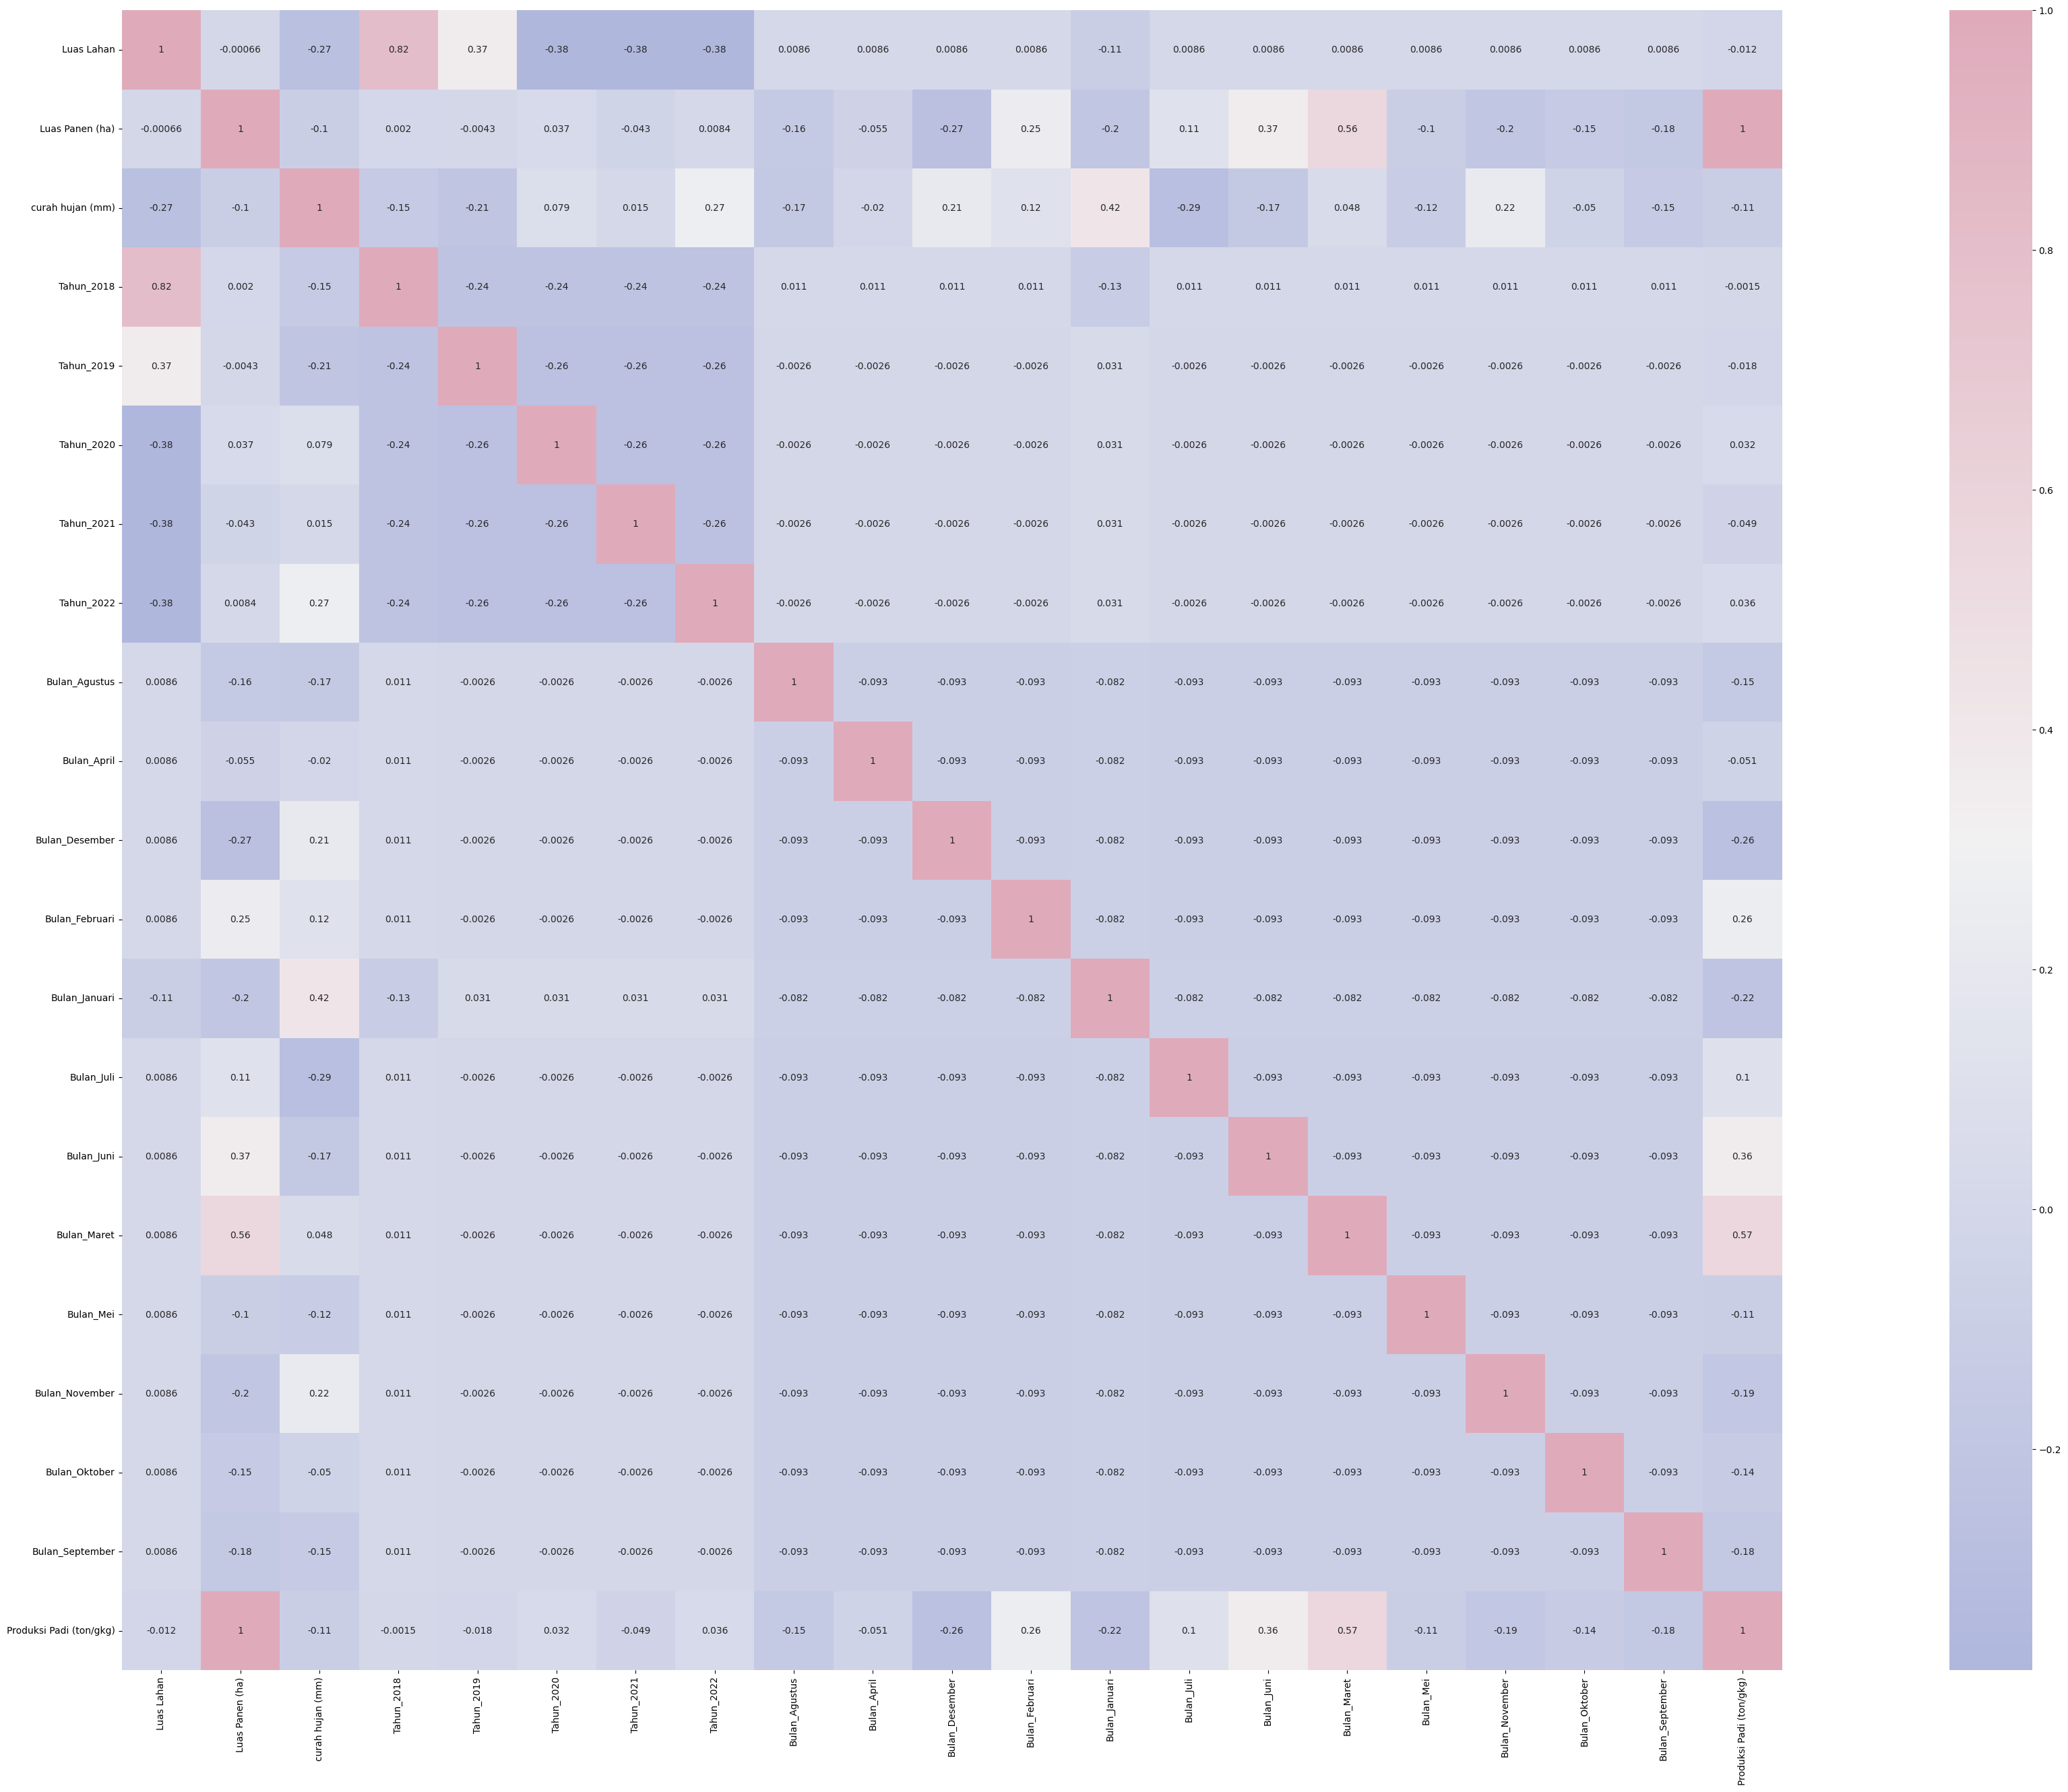

In [13]:
corrmat = data.corr(method='pearson')
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(64,32))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

# Split

In [14]:
hist_window = 2
horizon = 3

In [15]:
def deret_waktu_regresi(dataset, target, start, end, window, horizon):
  X = []
  y = []
  start = start + window
  if end is None:
    end = len(dataset) - horizon

  for i in range(start, end):
    indices = range(i-window, i)
    X.append(dataset[indices])

    #indicey = range(i+1, i+1+horizon)
    indicey = range(i, i+horizon)
    y.append(target[indicey])

  return np.array(X), np.array(y)

In [16]:
np.array(X).shape[1]

3

In [17]:
np.array(y).shape[0]

59

In [18]:
n = int(y.shape[0]/horizon)
TRAIN_SPLIT = int(len(data)*.5)

In [19]:
y.shape[0], n, TRAIN_SPLIT

(59, 19, 29)

In [20]:
X, y[:n], 0, TRAIN_SPLIT, hist_window, horizon

(    curah hujan (mm)  Luas Panen (ha)  Luas Lahan
 0             273.90         16598.03     43573.0
 1             250.60          9352.41     43573.0
 2             177.30          2512.02     43573.0
 3              41.30          9882.90     43573.0
 4               0.00          7680.37     43573.0
 5               0.00          3594.00     43573.0
 6               0.00          1793.23     43573.0
 7             133.30          2663.34     43573.0
 8             142.00          1703.87     43573.0
 9             317.10           925.73     43573.0
 10            311.30           566.50     43573.0
 11            330.50          1069.39     41212.0
 12            260.50          4308.22     41212.0
 13            404.00         21148.74     41212.0
 14            256.33          2345.39     41212.0
 15             95.16          2836.33     41212.0
 16              0.00         13630.76     41212.0
 17              0.00          6908.50     41212.0
 18              0.00          

In [21]:
y[:n]

0     102755.27
1      57899.01
2      15551.44
3      57103.19
4      44377.02
5      20766.00
6      10361.25
7      18230.62
8      11663.03
9       6336.64
10      3877.70
11      6321.88
12     25468.78
13    125024.39
14     13865.17
15     16753.40
16     80513.07
17     40806.57
18     14270.22
Name: Produksi Padi (ton/gkg), dtype: float64

In [25]:
X


,curah hujan (mm),Luas Panen (ha),Luas Lahan
0,273.90,16598.03,43573.0
1,250.60,9352.41,43573.0
2,177.30,2512.02,43573.0
3,41.30,9882.90,43573.0
4,0.00,7680.37,43573.0
5,0.00,3594.00,43573.0
6,0.00,1793.23,43573.0
7,133.30,2663.34,43573.0
8,142.00,1703.87,43573.0
9,317.10,925.73,43573.0


In [22]:
# x_train_multi, y_train_multi = deret_waktu_regresi(
#     X, y[:n], 0, TRAIN_SPLIT, hist_window, horizon)
# x_test_multi, y_test_multi = deret_waktu_regresi(
#     X, y[:n], TRAIN_SPLIT, None, hist_window, horizon)

# RNN 

In [23]:
# Inisialisasi model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Pelatihan model LSTM dengan data asli dan fitur dari SVM
model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), verbose=2)

# Evaluasi model LSTM
y_pred_lstm = model.predict(X_test_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)
print(f"Mean Squared Error (MSE) for LSTM: {mse_lstm}")
print(f"Mean Absolute Error (MAE) for LSTM: {mae_lstm}")
print(f"R2 Score for LSTM: {r2_lstm}")

NameError: name 'X_train_lstm' is not defined

In [ ]:
X_train_lstm.shape[1]

In [ ]:
print (y_pred_lstm)

In [ ]:
svm_features

## Plot Hasil Prediksi

In [ ]:
# Visualisasi data aktual dan prediksi dari model LSTM
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label='Aktual', marker='o')
plt.plot(y_pred_lstm, label='Prediksi LSTM', linestyle='--', marker='x')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai Target')
plt.title('Perbandingan Data Aktual dan Prediksi dari Model LSTM')
plt.legend()
plt.grid(True)
plt.show()